In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml

We have 1797 samples


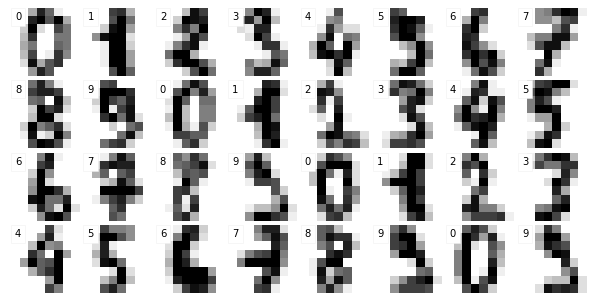

In [22]:
#Load data
digits = load_digits()
print('We have %d samples' %len(digits.target))

#plot the first 32 samples to get a senmse of the date
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for i in range(32):
    ax = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    ax. imshow(digits.images[i], cmap = plt.cm.gray_r)
    ax.text(0, 1, str(digits.target[i]), bbox = dict(facecolor = 'white'))

Number of samples in training set: 1437
Number of samples in test set: 360

Training set score: 0.940849
Test set score: 0.891667


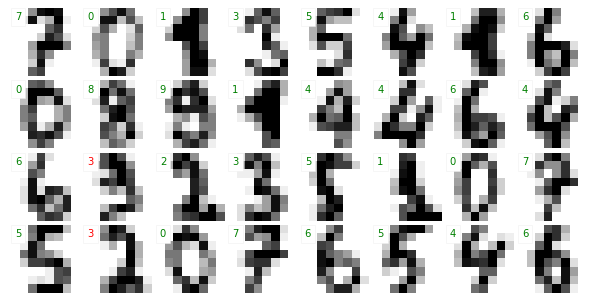

In [23]:
#split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
print('Number of samples in training set: %d' %(len(y_train)))
print('Number of samples in test set: %d' %(len(y_test)))

#standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

#apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#create the model
#if early stopping=True, a port of training data is used as validation data (default t=0.1)
mlp = MLPClassifier(hidden_layer_sizes =(100), activation = 'logistic', max_iter = 100, early_stopping = True)

#train the classifier with the training data 
mlp.fit(X_train_scaled, y_train)

print ('\nTraining set score: %f' % mlp.score(X_train_scaled, y_train))
print ('Test set score: %f' % mlp.score(X_test_scaled, y_test))

#predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)

fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

#plot the first 32 predicted digits: each image is 8x8 pixels 
for i in range(32):
    ax = fig.add_subplot(8, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(X_test.reshape(-1,8,8)[i], cmap= plt.cm.gray_r)
    
     #Label the iamge with the target value
    #green - correct classification, red * incorreect classification
    if X_test_predicted[i] == y_test[i]:
        ax.text(0,1, X_test_predicted[i], color = 'green', bbox = dict(facecolor = 'white'))
    else:    
        ax.text(0,1, X_test_predicted[i], color = 'red', bbox = dict(facecolor = 'white'))
       
        
            
            
    

In [24]:
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [25]:
dataset = datasets.load_boston()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

expected_y = y_test
predicted_y = model.predict(X_test)

MLPRegressor()


C:\Users\duygu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.5782695034994509
0.08096183641743356


C:\Users\duygu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

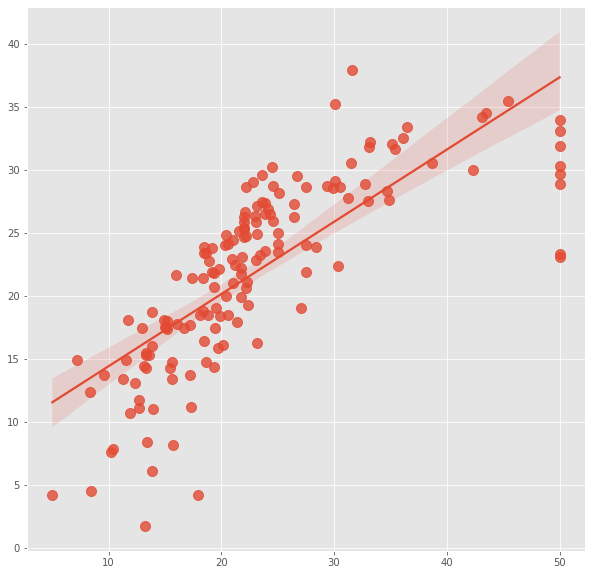

In [28]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})